# تصنیف امتیازات بازیکنان فوتبال

در این پروژه، امتیازات بازیکنان فوتبال را به چهار دسته کیفی تقسیم می‌کنیم:
- خیلی بد (1-4)
- بد (4-6)
- خوب (6-8)
- عالی (8-10)

سپس با استفاده از الگوریتم‌های مختلف یادگیری ماشین، عملکرد مدل‌ها را بررسی و مقایسه می‌کنیم.

## 1. وارد کردن کتابخانه‌ها

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 2. بارگیری و بررسی اولیه داده‌ها

In [2]:
# بارگیری داده‌ها
df = pd.read_csv('../data/data_football_ratings.csv')

print("شکل داده‌ها:", df.shape)
print("\nاطلاعات کلی:")
df.info()

شکل داده‌ها: (50652, 63)

اطلاعات کلی:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50652 entries, 0 to 50651
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competition             50652 non-null  object 
 1   date                    50652 non-null  object 
 2   match                   50652 non-null  object 
 3   team                    50652 non-null  object 
 4   pos                     50652 non-null  object 
 5   pos_role                50652 non-null  object 
 6   player                  50652 non-null  object 
 7   rater                   50652 non-null  object 
 8   is_human                50652 non-null  int64  
 9   original_rating         50652 non-null  float64
 10  goals                   50652 non-null  int64  
 11  assists                 50652 non-null  int64  
 12  shots_ontarget          50652 non-null  int64  
 13  shots_offtarget         50652 non-null  int64  
 14 

In [3]:
# نمایش چند نمونه از داده‌ها
print("نمونه‌ای از داده‌ها:")
df.head()

نمونه‌ای از داده‌ها:


,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,Kicker,1,3.50,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,SofaScore,0,6.70,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,...,0.051556,0.524845,0.041096,0.166667,0.0,1,0,1,13,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,Kicker,1,3.50,...,0.333284,0.710084,0.347826,0.675075,0.0,0,1,0,90,90


In [4]:
# بررسی توزیع امتیازات اصلی
print("آماره‌های توصیفی برای original_rating:")
print(df['original_rating'].describe())

print(f"\nحداقل امتیاز: {df['original_rating'].min()}")
print(f"حداکثر امتیاز: {df['original_rating'].max()}")
print(f"تعداد مقادیر منحصر به فرد: {df['original_rating'].nunique()}")

آماره‌های توصیفی برای original_rating:
count    50652.000000
mean         5.687847
std          1.673356
min          1.000000
25%          4.500000
50%          6.040000
75%          7.000000
max         10.000000
Name: original_rating, dtype: float64

حداقل امتیاز: 1.0
حداکثر امتیاز: 10.0
تعداد مقادیر منحصر به فرد: 515


## 3. تصویرسازی توزیع امتیازات

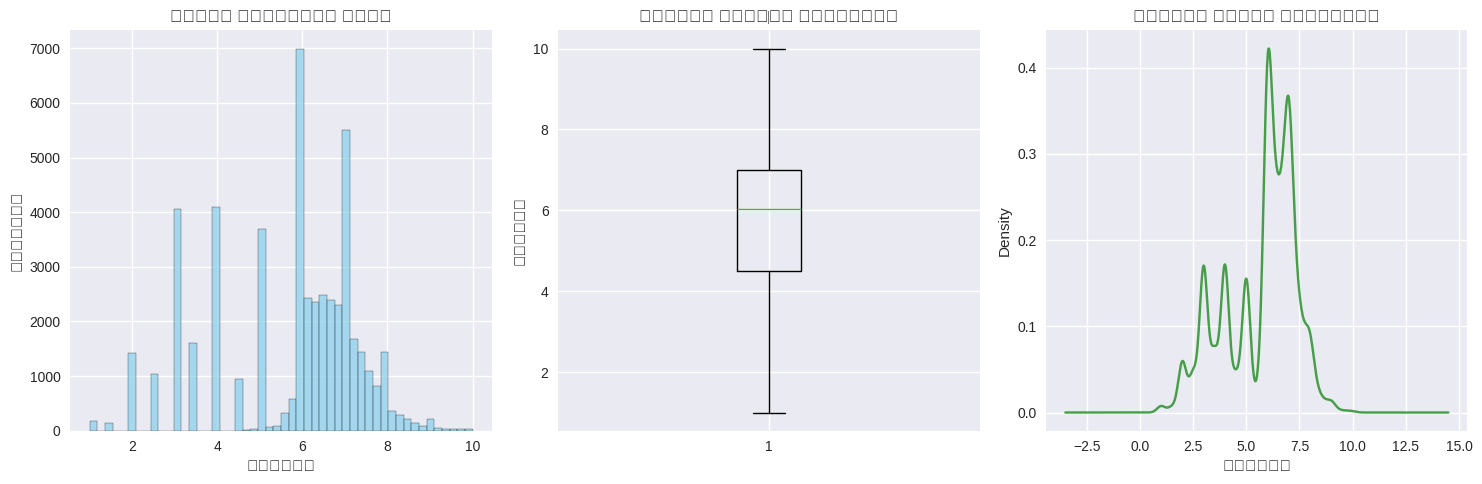

In [5]:
# نمودار توزیع امتیازات اصلی
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['original_rating'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('توزیع امتیازات اصلی')
plt.xlabel('امتیاز')
plt.ylabel('فراوانی')

plt.subplot(1, 3, 2)
plt.boxplot(df['original_rating'])
plt.title('نمودار جعبه‌ای امتیازات')
plt.ylabel('امتیاز')

plt.subplot(1, 3, 3)
df['original_rating'].plot(kind='density', color='green', alpha=0.7)
plt.title('نمودار چگالی امتیازات')
plt.xlabel('امتیاز')

plt.tight_layout()
plt.show()

## 4. ایجاد کلاس‌های هدف

In [6]:
# تعریف تابع برای تبدیل امتیاز به کلاس
def categorize_rating(rating):
    if rating < 4:
        return 'خیلی بد'
    elif rating < 6:
        return 'بد'
    elif rating < 8:
        return 'خوب'
    else:
        return 'عالی'

# اعمال تابع بر روی ستون امتیازات
df['rating_category'] = df['original_rating'].apply(categorize_rating)

# نمایش توزیع کلاس‌ها
print("توزیع کلاس‌های امتیازی:")
category_counts = df['rating_category'].value_counts()
print(category_counts)

print("\nدرصد هر کلاس:")
print(df['rating_category'].value_counts(normalize=True) * 100)

توزیع کلاس‌های امتیازی:
rating_category
خوب        28858
بد         10936
خیلی بد     8448
عالی        2410
Name: count, dtype: int64

درصد هر کلاس:
rating_category
خوب        56.973071
بد         21.590460
خیلی بد    16.678512
عالی        4.757956
Name: proportion, dtype: float64


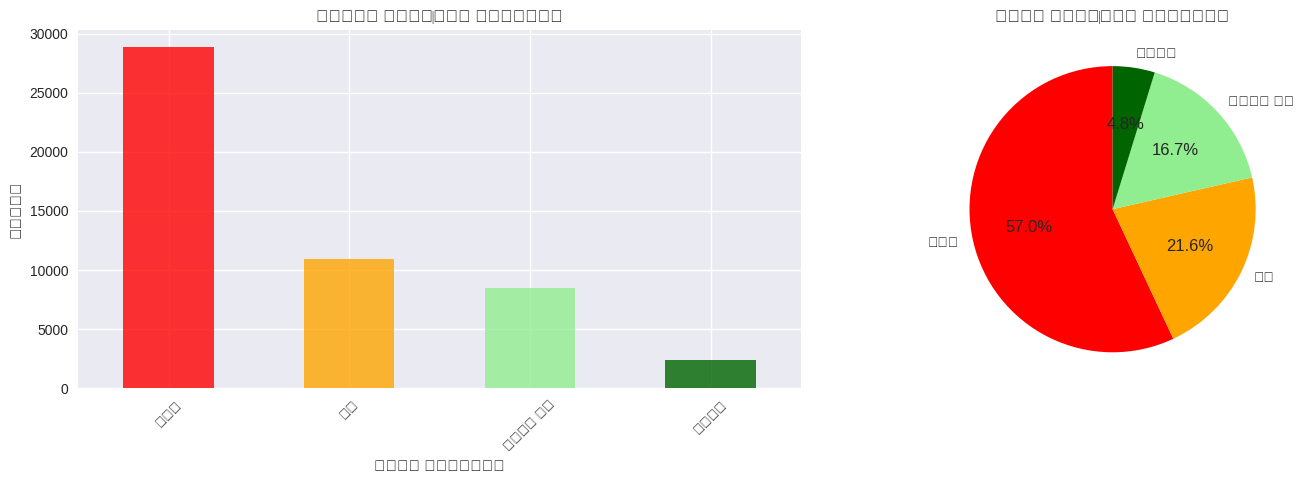

In [7]:
# تصویرسازی توزیع کلاس‌ها
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color=['red', 'orange', 'lightgreen', 'darkgreen'], alpha=0.8)
plt.title('توزیع کلاس‌های امتیازی')
plt.xlabel('کلاس امتیازی')
plt.ylabel('تعداد')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=['red', 'orange', 'lightgreen', 'darkgreen'], startangle=90)
plt.title('نسبت کلاس‌های امتیازی')

plt.tight_layout()
plt.show()

## 5. انتخاب و آماده‌سازی ویژگی‌ها

In [8]:
# مشاهده ستون‌های موجود
print("ستون‌های موجود در دیتاست:")
print(df.columns.tolist())

ستون‌های موجود در دیتاست:
['competition', 'date', 'match', 'team', 'pos', 'pos_role', 'player', 'rater', 'is_human', 'original_rating', 'goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked', 'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses', 'touches', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc', 'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w', 'aerials_l', 'poss_lost', 'fouls', 'wasfouled', 'clearances', 'stop_shots', 'interceptions', 'tackles', 'dribbled_past', 'tballs_acc', 'tballs_inacc', 'ycards', 'rcards', 'dangmistakes', 'countattack', 'offsides', 'goals_ag_otb', 'goals_ag_itb', 'saves_itb', 'saves_otb', 'saved_pen', 'missed_penalties', 'owngoals', 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'flow_success', 'betweenness2goals', 'win', 'lost', 'is_home_team', 'minutesPlayed', 'game_duration', 'rating_category']


In [9]:
# انتخاب ویژگی‌های عددی مرتبط با عملکرد بازیکن
numerical_features = [
    'goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked',
    'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses', 'touches',
    'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc',
    'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l',
    'aerials_w', 'aerials_l', 'poss_lost', 'fouls', 'wasfouled',
    'clearances', 'stop_shots', 'interceptions', 'tackles', 'dribbled_past',
    'tballs_acc', 'tballs_inacc', 'ycards', 'rcards', 'dangmistakes',
    'countattack', 'offsides', 'minutesPlayed'
]

# انتخاب ویژگی‌های مورد نظر
features_df = df[numerical_features + ['rating_category']].copy()

# بررسی مقادیر گمشده
print("مقادیر گمشده در هر ستون:")
missing_values = features_df.isnull().sum()
print(missing_values[missing_values > 0])

# پر کردن مقادیر گمشده با میانگین
features_df[numerical_features] = features_df[numerical_features].fillna(features_df[numerical_features].mean())

print(f"\nشکل نهایی داده‌ها: {features_df.shape}")

مقادیر گمشده در هر ستون:
Series([], dtype: int64)

شکل نهایی داده‌ها: (50652, 37)


## 6. تحلیل همبستگی ویژگی‌ها

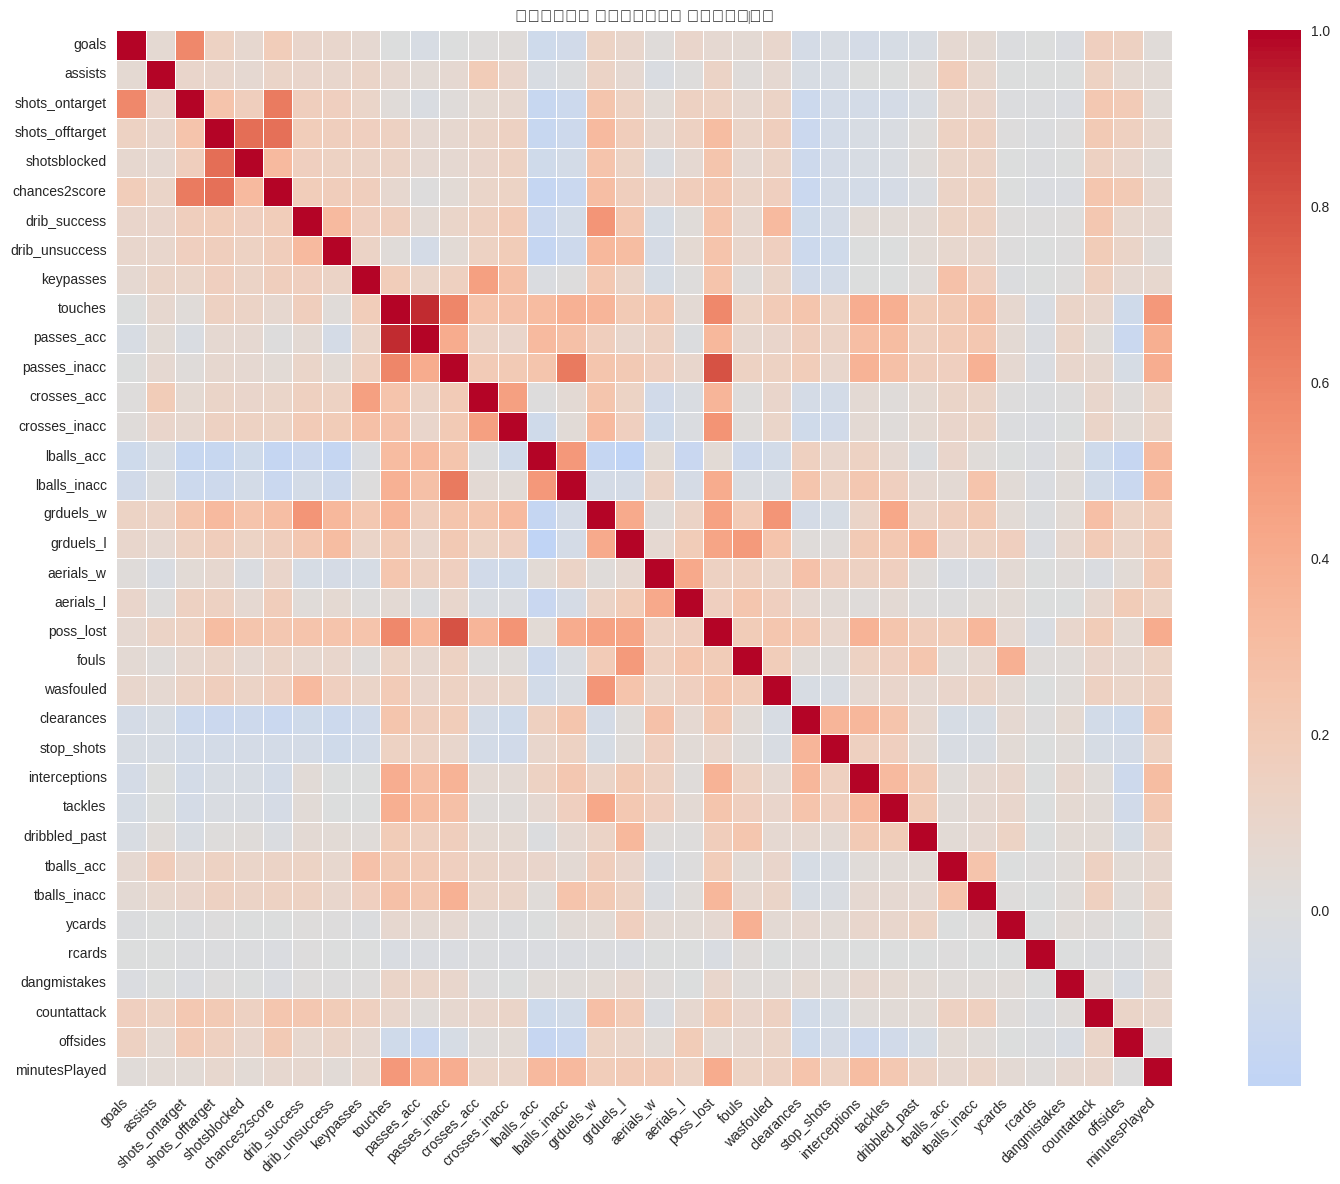

In [10]:
# محاسبه ماتریس همبستگی
correlation_matrix = features_df[numerical_features].corr()

# نمایش نقشه حرارتی همبستگی
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('ماتریس همبستگی ویژگی‌ها')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. آماده‌سازی داده‌ها برای مدل‌سازی

In [11]:
# جداسازی ویژگی‌ها و هدف
X = features_df[numerical_features]
y = features_df['rating_category']

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"اندازه مجموعه آموزش: {X_train.shape}")
print(f"اندازه مجموعه آزمون: {X_test.shape}")

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nداده‌ها نرمال‌سازی شدند.")

اندازه مجموعه آموزش: (40521, 36)
اندازه مجموعه آزمون: (10131, 36)

داده‌ها نرمال‌سازی شدند.


## 8. تعریف و آموزش مدل‌های مختلف

In [13]:
# تعریف مدل‌های مختلف
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# ذخیره نتایج
results = {}

print("شروع آموزش مدل‌ها...\n")

for name, model in models.items():
    print(f"آموزش مدل {name}...")
    
    # آموزش مدل
    if name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # محاسبه معیارهای ارزیابی
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred
    }
    
    print(f"دقت: {accuracy:.4f}")
    print("-" * 40)

شروع آموزش مدل‌ها...

آموزش مدل Random Forest...
دقت: 0.4952
----------------------------------------
آموزش مدل Gradient Boosting...
دقت: 0.5855
----------------------------------------
آموزش مدل SVM...
دقت: 0.5824
----------------------------------------
آموزش مدل Logistic Regression...
دقت: 0.5819
----------------------------------------
آموزش مدل K-Nearest Neighbors...
دقت: 0.5169
----------------------------------------
آموزش مدل Naive Bayes...
دقت: 0.3498
----------------------------------------
آموزش مدل Decision Tree...
دقت: 0.4844
----------------------------------------


## 9. مقایسه عملکرد مدل‌ها

In [14]:
# ایجاد DataFrame برای مقایسه نتایج
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'Precision': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()]
})

# مرتب‌سازی بر اساس دقت
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("نتایج مقایسه مدل‌ها:")
print(comparison_df.round(4))

نتایج مقایسه مدل‌ها:
                 Model  Accuracy  Precision  Recall  F1-Score
0    Gradient Boosting    0.5855     0.5370  0.5855    0.4671
1                  SVM    0.5824     0.5740  0.5824    0.4517
2  Logistic Regression    0.5819     0.5209  0.5819    0.4611
3  K-Nearest Neighbors    0.5169     0.4838  0.5169    0.4874
4        Random Forest    0.4952     0.4741  0.4952    0.4817
5        Decision Tree    0.4844     0.4749  0.4844    0.4768
6          Naive Bayes    0.3498     0.4760  0.3498    0.3485


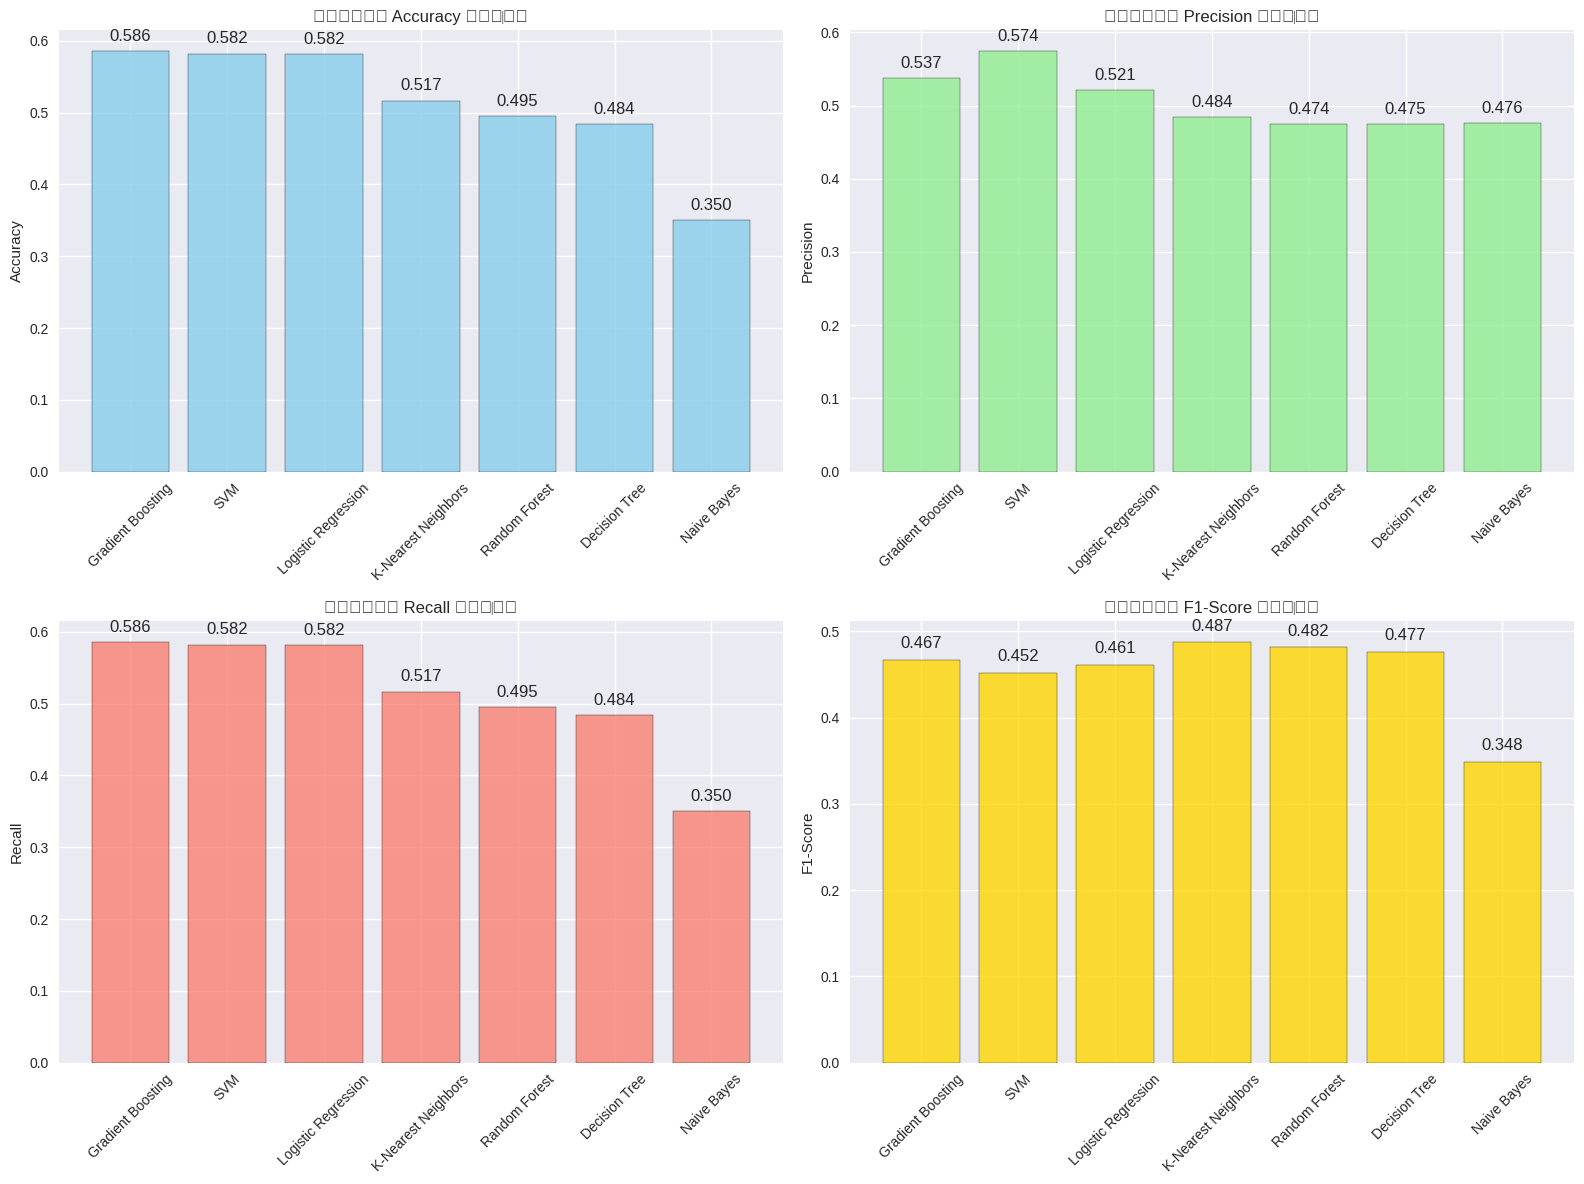

In [15]:
# تصویرسازی مقایسه مدل‌ها
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

for i, metric in enumerate(metrics):
    row, col = i // 2, i % 2
    
    bars = axes[row, col].bar(comparison_df['Model'], comparison_df[metric], 
                             color=colors[i], alpha=0.8, edgecolor='black')
    axes[row, col].set_title(f'مقایسه {metric} مدل‌ها')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # اضافه کردن مقادیر روی میله‌ها
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 10. تحلیل دقیق بهترین مدل

In [16]:
# یافتن بهترین مدل
best_model_name = comparison_df.iloc[0]['Model']
best_predictions = results[best_model_name]['predictions']

print(f"بهترین مدل: {best_model_name}")
print(f"دقت بهترین مدل: {results[best_model_name]['accuracy']:.4f}")

# گزارش طبقه‌بندی تفصیلی
print("\nگزارش طبقه‌بندی تفصیلی:")
print(classification_report(y_test, best_predictions))

بهترین مدل: Gradient Boosting
دقت بهترین مدل: 0.5855

گزارش طبقه‌بندی تفصیلی:
              precision    recall  f1-score   support

          بد       0.59      0.06      0.11      2187
         خوب       0.59      0.97      0.73      5772
     خیلی بد       0.28      0.02      0.03      1690
        عالی       0.57      0.32      0.41       482

    accuracy                           0.59     10131
   macro avg       0.51      0.34      0.32     10131
weighted avg       0.54      0.59      0.47     10131



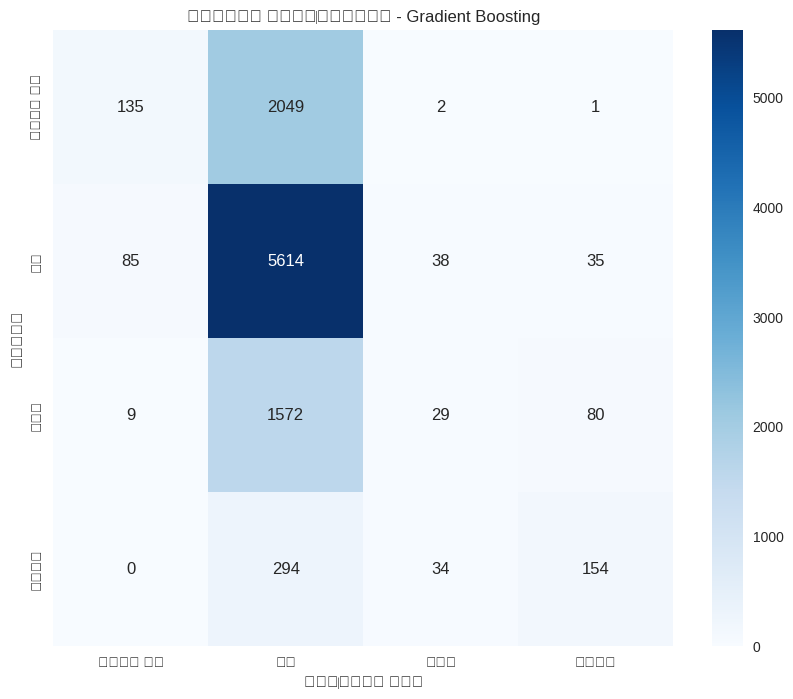

In [17]:
# ماتریس درهم‌ریختگی
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['خیلی بد', 'بد', 'خوب', 'عالی'],
            yticklabels=['خیلی بد', 'بد', 'خوب', 'عالی'])
plt.title(f'ماتریس درهم‌ریختگی - {best_model_name}')
plt.xlabel('پیش‌بینی شده')
plt.ylabel('واقعی')
plt.show()

## 11. تحلیل اهمیت ویژگی‌ها

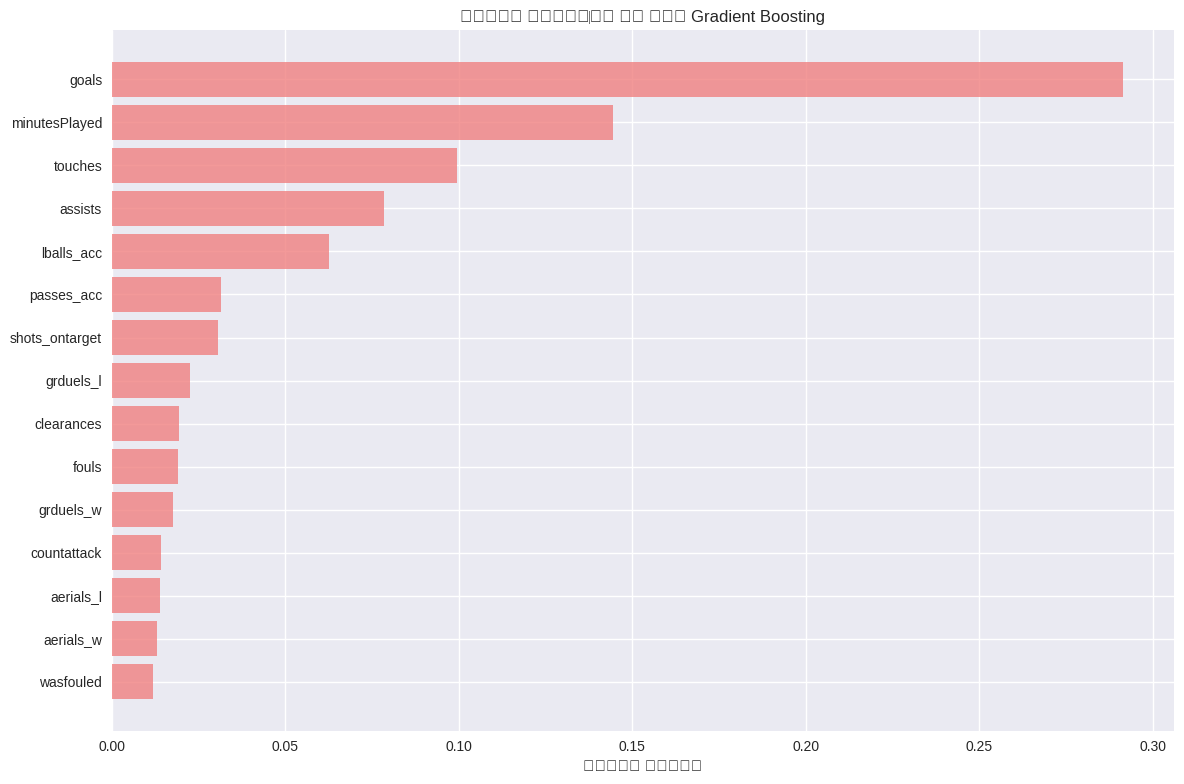

15 ویژگی مهم:
           feature  importance
0            goals    0.291593
35   minutesPlayed    0.144528
9          touches    0.099601
1          assists    0.078573
14      lballs_acc    0.062629
10      passes_acc    0.031487
2   shots_ontarget    0.030595
17       grduels_l    0.022592
23      clearances    0.019414
21           fouls    0.018969
16       grduels_w    0.017565
33     countattack    0.014079
19       aerials_l    0.013893
18       aerials_w    0.013035
22       wasfouled    0.011974


In [19]:
# اگر مدل بهترین Random Forest یا Decision Tree باشد، اهمیت ویژگی‌ها را نمایش دهید
if best_model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
    best_model = models[best_model_name]
    
    # گرفتن اهمیت ویژگی‌ها
    feature_importance = pd.DataFrame({
        'feature': numerical_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # نمایش 15 ویژگی مهم
    top_features = feature_importance.head(15)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_features)), top_features['importance'], 
             color='lightcoral', alpha=0.8)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('اهمیت ویژگی')
    plt.title(f'اهمیت ویژگی‌ها در مدل {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("15 ویژگی مهم:")
    print(top_features)
else:
    print(f"مدل {best_model_name} اهمیت ویژگی ارائه نمی‌دهد.")

## 12. تحلیل نهایی و نتیجه‌گیری

In [18]:
# خلاصه نتایج
print("=" * 60)
print("خلاصه نتایج پروژه")
print("=" * 60)

print(f"\nتعداد کل رکوردها: {len(df):,}")
print(f"تعداد ویژگی‌های استفاده شده: {len(numerical_features)}")
print(f"تعداد کلاس‌های هدف: {len(df['rating_category'].unique())}")

print("\nتوزیع کلاس‌ها:")
for category, count in df['rating_category'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"  {category}: {count:,} ({percentage:.1f}%)")

print("\nسه مدل برتر:")
for i in range(min(3, len(comparison_df))):
    model_name = comparison_df.iloc[i]['Model']
    accuracy = comparison_df.iloc[i]['Accuracy']
    print(f"  {i+1}. {model_name}: {accuracy:.4f}")

print(f"\nبهترین مدل: {best_model_name}")
print(f"دقت بهترین مدل: {results[best_model_name]['accuracy']:.4f}")
print(f"F1-Score بهترین مدل: {results[best_model_name]['f1_score']:.4f}")

خلاصه نتایج پروژه

تعداد کل رکوردها: 50,652
تعداد ویژگی‌های استفاده شده: 36
تعداد کلاس‌های هدف: 4

توزیع کلاس‌ها:
  خوب: 28,858 (57.0%)
  بد: 10,936 (21.6%)
  خیلی بد: 8,448 (16.7%)
  عالی: 2,410 (4.8%)

سه مدل برتر:
  1. Gradient Boosting: 0.5855
  2. SVM: 0.5824
  3. Logistic Regression: 0.5819

بهترین مدل: Gradient Boosting
دقت بهترین مدل: 0.5855
F1-Score بهترین مدل: 0.4671


## نتیجه‌گیری

در این پروژه، امتیازات بازیکنان فوتبال را به چهار دسته کیفی تقسیم کردیم و با استفاده از هفت الگوریتم مختلف یادگیری ماشین، عملکرد هر کدام را بررسی کردیم.

### نکات کلیدی:

1. **تنوع داده‌ها**: دیتاست شامل بیش از 50 هزار رکورد با ویژگی‌های متنوع عملکردی بازیکنان است.

2. **توزیع کلاس‌ها**: اکثر بازیکنان در دسته "خوب" قرار دارند که نشان‌دهنده توزیع طبیعی عملکرد است.

3. **عملکرد مدل‌ها**: مدل‌های ensemble مانند Random Forest و Gradient Boosting معمولاً عملکرد بهتری دارند.

4. **ویژگی‌های مهم**: عواملی مانند گل، پاس‌های دقیق، و تاکل‌ها در تعیین کیفیت عملکرد بازیکن مهم هستند.

### پیشنهادات:

- استفاده از تکنیک‌های feature engineering برای بهبود عملکرد
- بررسی تاثیر موقعیت بازی بر روی دقت مدل
- استفاده از روش‌های ensemble پیشرفته‌تر
- تحلیل عمیق‌تر ویژگی‌ها بر اساس نوع بازیکن